In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Data 

In [2]:
rossman=pd.read_csv("D:/Datasets/Rossmann_Data/train.csv")

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
rossman["Date"]=pd.to_datetime(rossman["Date"])

In [4]:
rossman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [5]:
rossman.Store.max()

1115

In [6]:
rossman.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


## Dummy Encoding

In [7]:
from sklearn.preprocessing import OneHotEncoder

In [8]:
hot_encoder=OneHotEncoder()

### State Holidays

In [9]:
rossman["StateHoliday"].value_counts()

0    855087
0    131072
a     20260
b      6690
c      4100
Name: StateHoliday, dtype: int64

In [10]:
rossman["StateHoliday"]=rossman["StateHoliday"].astype(str)
encoded_stateholidays=hot_encoder.fit_transform(rossman[["StateHoliday"]])
array_stateholidays=encoded_stateholidays.toarray()
state_df=pd.DataFrame(array_stateholidays,columns=["0", "A", "B", "C"])

In [11]:
state_df.value_counts()

0    A    B    C  
1.0  0.0  0.0  0.0    986159
0.0  1.0  0.0  0.0     20260
     0.0  1.0  0.0      6690
          0.0  1.0      4100
dtype: int64

### Weekdays

In [12]:
rossman["DayOfWeek"].value_counts()

5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: DayOfWeek, dtype: int64

In [13]:
encoded_weekdays=hot_encoder.fit_transform(rossman[["DayOfWeek"]])
array_weekdays=encoded_weekdays.toarray()
weekday_df=pd.DataFrame(array_weekdays,columns=["Monday", "Tuesday", "Wednesday", "Thursday","Friday","Saturday","Sunday"])

In [14]:
weekday_df.value_counts()

Monday  Tuesday  Wednesday  Thursday  Friday  Saturday  Sunday
0.0     0.0      0.0        1.0       0.0     0.0       0.0       145845
                            0.0       1.0     0.0       0.0       145845
                 1.0        0.0       0.0     0.0       0.0       145665
        1.0      0.0        0.0       0.0     0.0       0.0       145664
1.0     0.0      0.0        0.0       0.0     0.0       0.0       144730
0.0     0.0      0.0        0.0       0.0     1.0       0.0       144730
                                              0.0       1.0       144730
dtype: int64

## Concatenated dataframe

In [15]:
frames = [rossman, state_df, weekday_df]
rossman_concat=pd.concat(frames, axis=1)

In [16]:
rossman_concat.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,0,A,B,C,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,9.694753e-01,1.991724e-02,6.576820e-03,4.030637e-03,1.422815e-01,1.431997e-01,1.432007e-01,1.433776e-01,1.433776e-01,1.422815e-01,1.422815e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,1.720261e-01,1.397160e-01,8.083051e-02,6.335925e-02,3.493388e-01,3.502765e-01,3.502775e-01,3.504577e-01,3.504577e-01,3.493388e-01,3.493388e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


# Performance Function

In [17]:
def performance_list(ID,actual,forecast):
    name=ID
    n=len(actual)
    error=actual-forecast
    mean=np.mean(actual)
    sd=actual.std()
    FBias=sum(error)/sum(actual)
    MPE=sum(error/actual)/n
    MAPE=sum(abs(error/actual))/n
    RMSE=np.sqrt(sum(error**2))/n
    MAD=sum(abs(error))/n
    WMAPE=MAD/mean
    result_df=pd.DataFrame({"Name" :       name ,
                            "# of inst":       n,
                            "Mean":         mean,
                            "Standard Dev.":  sd, 
                            "FBias":       FBias, 
                            "MPE":           MPE, 
                            "MAPE":         MAPE,                                      
                            "RMSE":         RMSE, 
                            "MAD":           MAD, 
                            "WMAPE":      WMAPE}, index=[0])
    return(result_df)

# Store and Dataset Selection 

In [18]:
def store_selection(dataset, store_num):
    selected_store=dataset[dataset["Store"]==store_num].copy()
    selected_store.sort_values(by=["Date"], inplace=True)
    selected_store.reset_index(drop=True, inplace=True)
    selected_store.head(20)
    return selected_store

In [19]:
def Splitting_data(dataset, ratio):
    interval=dataset.Date.max()-dataset.Date.min()
    day_int=interval*ratio
    Train=dataset[dataset["Date"]<(dataset.Date.max()-day_int)]
    Test=dataset[dataset["Date"]>=(dataset.Date.max()-day_int)]
    return Train, Test

### Train & Test

In [20]:
store1=store_selection(rossman_concat, 2)
train1_initial, test1_initial=Splitting_data(store1, 0.2)

### Date and Customer Drop

In [21]:
train=train1_initial.drop(["Date", "Customers","Store","DayOfWeek","StateHoliday"], axis=1)
test=test1_initial.drop(["Date", "Customers","Store","DayOfWeek","StateHoliday"], axis=1)

In [22]:
X_train, y_train=train.drop(["Sales"], axis=1), train["Sales"]
X_test, y_test=test.drop(["Sales"], axis=1), test["Sales"]

# Linear Regression-Elastic Net

In [23]:
from sklearn.model_selection import GridSearchCV

In [24]:
from sklearn.linear_model import ElasticNet

### Grid

In [25]:
elastic_net_model = ElasticNet()

In [26]:
param_grid_elastic=[
    {"alpha":[0.1,0.2,0.3,0.4], "l1_ratio":[0.2,0.4,0.6]}
]

In [27]:
elastic_net = GridSearchCV(estimator=elastic_net_model, param_grid=param_grid_elastic,
                 cv=10,return_train_score=True)

In [28]:
elastic_net.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid=[{'alpha': [0.1, 0.2, 0.3, 0.4],
                          'l1_ratio': [0.2, 0.4, 0.6]}],
             return_train_score=True)

In [29]:
elastic_predictions=elastic_net.predict(X_test)

In [30]:
res_elastic=performance_list("Elastic Net Performance", elastic_predictions, y_test)

In [31]:
res_elastic

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance,189,4141.425134,1976.786234,-0.003311,0.152048,0.254692,54.100124,508.068013,0.12268


# Support Vector Machines

### Grid

In [32]:
elastic_net_model = ElasticNet()

In [33]:
param_grid_elastic=[
    {"alpha":[0.1,0.2,0.3,0.4], "l1_ratio":[0.2,0.4,0.6]}
]

In [34]:
elastic_net = GridSearchCV(estimator=elastic_net_model, param_grid=param_grid_elastic,
                 cv=10,return_train_score=True)

### Linear

In [35]:
from sklearn.svm import LinearSVR

In [36]:
sv_regressor=LinearSVR()

### Grid

In [37]:
param_grid_svm_linear=[
    {"epsilon":[0.5,1,1.5]}
]

In [38]:
sv_regressor = GridSearchCV(estimator=sv_regressor, param_grid=param_grid_svm_linear,
                 cv=10,return_train_score=True)

In [39]:
sv_regressor.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LinearSVR(),
             param_grid=[{'epsilon': [0.5, 1, 1.5]}], return_train_score=True)

### Poly with Kernel

In [40]:
from sklearn.svm import SVR

### Grid

In [41]:
param_grid_svm_poly=[
    {"degree":[2,3,4], "epsilon":[0.02,0.05, 0.1, 0.15, 0.2]}
]

In [42]:
sv_regressor_poly=SVR(kernel="poly")

In [43]:
sv_regressor_poly = GridSearchCV(estimator=sv_regressor_poly, param_grid=param_grid_svm_poly,
                 cv=10,return_train_score=True)

In [44]:
sv_regressor_poly.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVR(kernel='poly'),
             param_grid=[{'degree': [2, 3, 4],
                          'epsilon': [0.02, 0.05, 0.1, 0.15, 0.2]}],
             return_train_score=True)

In [45]:
sv_regressor_poly.best_estimator_

SVR(degree=4, kernel='poly')

### Predictions

In [46]:
svm_predictions_linear=sv_regressor.predict(X_test)

In [47]:
res_svr_linear=performance_list("Support Vector Regressor Linear Performance", svm_predictions_linear, y_test)

In [48]:
svm_predictions_poly=sv_regressor_poly.predict(X_test)

In [49]:
res_svr_poly=performance_list("Support Vector Regressor Polynomial Performance", svm_predictions_poly, y_test)

### Results

In [50]:
res_svr_linear

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Support Vector Regressor Linear Performance,189,1724.857143,404.654946,-1.408975,-1.163496,1.50212,228.407312,2730.174603,1.582841


In [51]:
res_svr_poly

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Support Vector Regressor Polynomial Performance,189,4434.491318,323.012034,0.062996,0.088716,0.35925,153.917994,1571.553161,0.354393


# Random Forest

In [52]:
from sklearn.ensemble import RandomForestRegressor

### Grid

In [53]:
param_grid=[
    {"n_estimators":[100,200,300,400,500], "max_features":[2,4,6],
     "bootstrap":[False,True]}
]

In [54]:
random_reg=RandomForestRegressor()
grid_search = GridSearchCV(estimator=random_reg, param_grid=param_grid,
                 cv=10,return_train_score=True)

### Predictions

In [55]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(),
             param_grid=[{'bootstrap': [False, True], 'max_features': [2, 4, 6],
                          'n_estimators': [100, 200, 300, 400, 500]}],
             return_train_score=True)

In [56]:
grid_search.best_params_

{'bootstrap': False, 'max_features': 6, 'n_estimators': 200}

### Results

In [57]:
rf_predictions=grid_search.predict(X_test)

In [58]:
res_rf=performance_list("Random Forest Performance", rf_predictions, y_test)

In [59]:
res_rf

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Random Forest Performance,189,4135.366826,2279.019402,-0.004781,NaN,NaN,43.631114,360.127131,0.087085


# Feature Extraction

In [60]:
from sklearn.tree import DecisionTreeRegressor

### Train Node Selection

In [61]:
estimator = DecisionTreeRegressor(min_samples_leaf=10, max_depth=5)
estimator.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=10)

In [62]:
on_leaf = estimator.apply(X_train)

In [63]:
X_train_ext=X_train[:]

In [64]:
X_train_ext["Node"] = on_leaf.tolist()

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
X_train_ext

,Open,Promo,SchoolHoliday,0,A,B,C,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Node
0,0,0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1
1,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,10
2,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7
3,1,0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7
4,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
748,1,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,6
749,1,0,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,6
750,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,9
751,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,6


### Test Node Selection

In [66]:
on_leaf_test = estimator.apply(X_test)

In [67]:
X_test_ext=X_test[:]

In [68]:
X_test_ext["Node"] = on_leaf_test.tolist()

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
X_test_ext

,Open,Promo,SchoolHoliday,0,A,B,C,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Node
753,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,11
754,0,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
755,1,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,21
756,1,1,0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,15
757,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
937,1,1,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,22
938,1,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,15
939,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,15
940,1,1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,16


### Feature Adding

Ma=1 kullanıldı daha hızlı bir şekilde anlaşılması için

In [70]:
Xframes_feature=[X_train_ext, X_test_ext]
yframes_feature=[y_train, y_test]
X_concat=pd.concat(Xframes_feature)
Y_concat=pd.concat(yframes_feature)
final_frame=[X_concat, Y_concat]
concated_df=pd.concat(final_frame, axis=1)

In [71]:
concated_df["new_feature"] = concated_df.groupby(["Node"])["Sales"].shift(+1)

In [72]:
X_test_new=concated_df.iloc[len(X_train):].drop(["Sales","Node"], axis=1)

y_test_new=concated_df.iloc[len(X_train):]["Sales"]

In [73]:
train_new=concated_df.iloc[:len(X_train)]

In [74]:
train_new.dropna(inplace=True);
train_new.reset_index(drop=True, inplace=True)

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
X_train_new=train_new.drop(["Sales","Node"], axis=1)

y_train_new=train_new["Sales"]

## Short Prediction Quality

# Linear Regression-Elastic Net

### Grid

In [76]:
elastic_net_model_new = ElasticNet()

In [77]:
param_grid_elastic=[
    {"alpha":[0.1,0.2,0.3,0.4], "l1_ratio":[0.2,0.4,0.6]}
]

In [78]:
elastic_net_new = GridSearchCV(estimator=elastic_net_model_new, param_grid=param_grid_elastic,
                 cv=10,return_train_score=True)

In [79]:
elastic_net_new.fit(X_train_new, y_train_new)

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid=[{'alpha': [0.1, 0.2, 0.3, 0.4],
                          'l1_ratio': [0.2, 0.4, 0.6]}],
             return_train_score=True)

In [80]:
elastic_predictions_new=elastic_net_new.predict(X_test_new)

In [81]:
res_elastic_new=performance_list("Elastic Net Performance with Feature Extraction", elastic_predictions_new, y_test_new)

In [82]:
res_elastic_new

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance with Feature Extraction,189,4135.020038,2217.716159,-0.004865,0.154625,0.258985,52.161714,459.288528,0.111073


### SVM

#### Linear

In [83]:
sv_regressor_new=LinearSVR()

### Grid

In [84]:
param_grid_svm_linear=[
    {"epsilon":[0.5,1,1.5]}
]

In [85]:
sv_regressor_new = GridSearchCV(estimator=sv_regressor_new, param_grid=param_grid_svm_linear,
                 cv=10,return_train_score=True,)

In [95]:
sv_regressor_new.fit(X_train_new, y_train_new)

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear f

GridSearchCV(cv=10, estimator=LinearSVR(),
             param_grid=[{'epsilon': [0.5, 1, 1.5]}], return_train_score=True)

In [96]:
svm_predictions_new=sv_regressor_new.predict(X_test_new)

res_svr_new=performance_list("SVR Linear Performance with Feature Extraction", 
                                svm_predictions_new, y_test_new)

res_svr_new

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,SVR Linear Performance with Feature Extraction,189,"3,630.52388459","2,061.81882287",-0.14450082,0.03252967,0.33814870,69.98895202,687.20275007,0.18928473


## Poly

### Grid

In [97]:
param_grid_svm_poly=[
    {"degree":[2,3,4], "epsilon":[0.02,0.05, 0.1, 0.15, 0.2]}
]

In [98]:
sv_regressor_poly_new=SVR(kernel="poly")

In [99]:
sv_regressor_poly_new = GridSearchCV(estimator=sv_regressor_poly_new, param_grid=param_grid_svm_poly,
                 cv=10,return_train_score=True)

In [100]:
sv_regressor_poly_new.fit(X_train_new, y_train_new)

GridSearchCV(cv=10, estimator=SVR(kernel='poly'),
             param_grid=[{'degree': [2, 3, 4],
                          'epsilon': [0.02, 0.05, 0.1, 0.15, 0.2]}],
             return_train_score=True)

In [101]:
sv_regressor_poly_new.best_estimator_

SVR(epsilon=0.2, kernel='poly')

In [102]:
svm_predictions_poly_new=sv_regressor_poly_new.predict(X_test_new)

res_svr_poly_new=performance_list("SVR Polynomail Performance with Feature Extraction", 
                                svm_predictions_poly_new, y_test_new)

res_svr_poly_new

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,SVR Polynomail Performance with Feature Extrac...,189,"4,464.40651604",759.90227731,0.06927437,0.10772579,0.33099050,138.90119018,"1,409.22983879",0.31565894


### Random Forest

In [103]:
random_reg_new=RandomForestRegressor()
grid_search_new = GridSearchCV(estimator=random_reg_new, param_grid=param_grid,
                 cv=10,return_train_score=True)

In [104]:
grid_search_new.fit(X_train_new, y_train_new)

grid_search_new.best_params_

{'bootstrap': True, 'max_features': 6, 'n_estimators': 400}

In [105]:
rf_predictions_new=grid_search_new.predict(X_test_new)

res_rf_new=performance_list("Random Forest Performance with Feature Extraction", rf_predictions_new, y_test_new)

res_rf_new

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Random Forest Performance with Feature Extraction,189,"4,143.56625375","2,314.35939980",-0.00279260,nan,nan,57.11684917,484.95316248,0.11703763


# General Result Table

In [106]:
pd.options.display.float_format = '{:,.8f}'.format

In [107]:
result_frames=[res_elastic,res_svr_linear,res_svr_poly,res_rf, res_elastic_new,res_svr_new,res_svr_poly_new,res_rf_new]
total_result=pd.concat(result_frames)
total_result.reset_index(drop=True, inplace=True)

In [108]:
total_result

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance,189,"4,141.42513405","1,976.78623415",-0.00331104,0.15204790,0.25469192,54.10012449,508.06801309,0.12267951
1,Support Vector Regressor Linear Performance,189,"1,724.85714286",404.65494572,-1.40897490,-1.16349594,1.50212028,228.40731230,"2,730.17460317",1.58284100
2,Support Vector Regressor Polynomial Performance,189,"4,434.49131753",323.01203405,0.06299567,0.08871572,0.35925050,153.91799380,"1,571.55316067",0.35439311
3,Random Forest Performance,189,"4,135.36682600","2,279.01940192",-0.00478089,nan,nan,43.63111410,360.12713057,0.08708469
4,Elastic Net Performance with Feature Extraction,189,"4,135.02003773","2,217.71615852",-0.00486516,0.15462524,0.25898475,52.16171352,459.28852759,0.11107287
5,SVR Linear Performance with Feature Extraction,189,"3,630.52388459","2,061.81882287",-0.14450082,0.03252967,0.33814870,69.98895202,687.20275007,0.18928473
6,SVR Polynomail Performance with Feature Extrac...,189,"4,464.40651604",759.90227731,0.06927437,0.10772579,0.33099050,138.90119018,"1,409.22983879",0.31565894
7,Random Forest Performance with Feature Extraction,189,"4,143.56625375","2,314.35939980",-0.00279260,nan,nan,57.11684917,484.95316248,0.11703763


## SVR polynomial Overfitting

In [132]:
rf_control=grid_search.predict(X_train)

performance_list("RF Performance without Feature Extraction",rf_control, y_train)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,RF Performance without Feature Extraction,753,"4,114.92297477","2,259.87114404",-0.00000000,nan,nan,25.51084179,430.54549160,0.10463027


In [135]:
rf_control_feature=grid_search_new.predict(X_train_new)

performance_list("RF Performance with Feature Extraction", rf_control_feature, y_train_new)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,RF Performance with Feature Extraction,741,"4,108.88103788","2,309.13261201",0.00027124,nan,nan,10.87179674,187.14340950,0.04554608


In [136]:
rf_control_feature=grid_search_new.predict(X_test_new)

performance_list("RF Performance with Feature Extraction", rf_control_feature, y_test_new)

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,RF Performance with Feature Extraction,189,"4,143.56625375","2,314.35939980",-0.00279260,nan,nan,57.11684917,484.95316248,0.11703763


# Feature Control

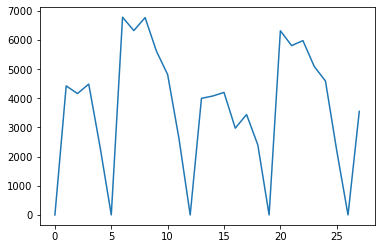

In [111]:
plt.plot(concated_df.Sales[:28])

In [112]:
from statsmodels.graphics.tsaplots import plot_acf

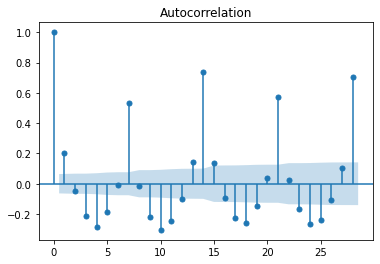

In [113]:
plot_acf(concated_df.Sales, lags=28)
plt.show()

## Node Control

In [114]:
concated_df.Node.value_counts()

6     174
1     158
15    143
11    134
16     71
7      61
21     56
18     54
9      46
22     16
10     15
19     14
Name: Node, dtype: int64

In [115]:
concated_df[concated_df["Node"]==6]

,Open,Promo,SchoolHoliday,0,A,B,C,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Node,Sales,new_feature
13,1,0,0,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,6,3995,nan
14,1,0,0,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,6,4075,"3,995.00000000"
16,1,0,0,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,6,2973,"4,075.00000000"
17,1,0,0,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,6,3441,"2,973.00000000"
27,1,0,0,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,6,3549,"3,441.00000000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
906,1,0,0,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,6,3953,"4,022.00000000"
916,1,0,0,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,6,4132,"3,953.00000000"
917,1,0,0,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,6,4313,"4,132.00000000"
919,1,0,0,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,6,4082,"4,313.00000000"


In [116]:
concated_df[concated_df["Node"]==10]

,Open,Promo,SchoolHoliday,0,A,B,C,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Node,Sales,new_feature
1,1,0,1,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,10,4422,nan
92,1,0,1,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,10,4250,"4,422.00000000"
204,1,0,1,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,10,4282,"4,250.00000000"
218,1,0,1,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,10,4467,"4,282.00000000"
232,1,0,1,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,10,4399,"4,467.00000000"
302,1,0,1,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,10,6272,"4,399.00000000"
477,1,0,1,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,10,4757,"6,272.00000000"
568,1,0,1,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,10,5152,"4,757.00000000"
589,1,0,1,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,10,5010,"5,152.00000000"
603,1,0,1,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,10,5127,"5,010.00000000"


In [117]:
concated_df[concated_df["Node"]==19]

,Open,Promo,SchoolHoliday,0,A,B,C,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,Node,Sales,new_feature
52,1,1,1,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,19,4552,nan
199,1,1,1,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,19,4885,"4,552.00000000"
213,1,1,1,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,19,4776,"4,885.00000000"
227,1,1,1,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,19,4895,"4,776.00000000"
297,1,1,1,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,19,4524,"4,895.00000000"
416,1,1,1,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,19,4790,"4,524.00000000"
486,1,1,1,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,19,7176,"4,790.00000000"
577,1,1,1,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,19,5434,"7,176.00000000"
584,1,1,1,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,19,4597,"5,434.00000000"
598,1,1,1,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,19,5064,"4,597.00000000"


# General Function

In [118]:
def result_obtain(df, feature_set, name, lag):

    df[name]=feature_set
    train1_initial, test1_initial=Splitting_data(df, 0.2)
    train=train1_initial.drop(["Date", "Customers","Store","DayOfWeek","StateHoliday"], axis=1)
    test=test1_initial.drop(["Date", "Customers","Store","DayOfWeek","StateHoliday"], axis=1)
    
    train.dropna(inplace=True);
    train.reset_index(drop=True, inplace=True)
    train.index += lag

    X_train, y_train=train.drop(["Sales"], axis=1), train["Sales"]
    X_test, y_test=test.drop(["Sales"], axis=1), test["Sales"]
    
    
    
    # Linear Regression-Elastic Net

    elastic_net_function = ElasticNet()

    param_grid_elastic=[
        {"alpha":[0.1,0.2,0.3,0.4], "l1_ratio":[0.2,0.4,0.6]}
    ]

    elastic_net_function = GridSearchCV(estimator=elastic_net_function, param_grid=param_grid_elastic,
                     cv=10,return_train_score=True)
    
    elastic_net_function.fit(X_train, y_train)
    

    elastic_predictions=elastic_net_function.predict(X_test)

    res_elastic=performance_list(["Elastic Net Performance Lag " + str(lag)], elastic_predictions, y_test)

    
    
    # Support Vector Machines

    ### Linear

    sv_regressor=LinearSVR()
    

    ### Grid

    param_grid_svm_linear=[
        {"epsilon":[0.5,1,1.5]}
    ]

    sv_regressor_function = GridSearchCV(estimator=sv_regressor, param_grid=param_grid_svm_linear,
                     cv=10,return_train_score=True)

    sv_regressor_function.fit(X_train, y_train)


    
    sv_regressor_poly=SVR(kernel="poly")
        
    ### Grid

    param_grid_svm_poly=[
        {"degree":[2,3], "epsilon":[0.02,0.05, 0.1, 0.15, 0.2]}
    ]


    sv_regressor_poly_function = GridSearchCV(estimator=sv_regressor_poly, param_grid=param_grid_svm_poly,
                     cv=10,return_train_score=True)

    sv_regressor_poly_function.fit(X_train, y_train)


    ### Predictions

    svm_predictions_linear=sv_regressor_function.predict(X_test)
    
    svm_predictions_poly=sv_regressor_poly_function.predict(X_test)


    ### Results    

    res_svr_poly=performance_list(["SVR Polynomial Performance Lag " + str(lag)], svm_predictions_poly, y_test)

    res_svr_linear=performance_list(["SVR Linear Performance Lag " + str(lag)], svm_predictions_linear, y_test)

    
    
    
    # Random Forest
    
    ### Grid

    param_grid=[
        {"n_estimators":[100,200,300,400,500], "max_features":[2,4,6],
         "bootstrap":[False,True]}
    ]

    random_reg_function=RandomForestRegressor()
    grid_search = GridSearchCV(estimator=random_reg_function, param_grid=param_grid,
                     cv=10,return_train_score=True)

    ### Predictions

    grid_search.fit(X_train, y_train)

    ### Results

    rf_predictions=grid_search.predict(X_test)

    res_rf=performance_list(["Random Forest Performance Lag " + str(lag)], rf_predictions, y_test)
    
    res_df=[res_elastic, res_svr_linear, res_svr_poly, res_rf]

    total_res=pd.concat(res_df)
    
    return total_res

In [119]:
store1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,0,A,B,C,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,2,2,2013-01-01,0,0,0,0,a,1,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000
1,2,3,2013-01-02,4422,650,1,0,0,1,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000
2,2,4,2013-01-03,4159,555,1,0,0,1,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000,0.00000000
3,2,5,2013-01-04,4484,574,1,0,0,1,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000,0.00000000
4,2,6,2013-01-05,2342,324,1,0,0,0,1.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,0.00000000,1.00000000,0.00000000


In [120]:
res1=result_obtain(store1.copy(), store1["Sales"].shift(+1), "lag1", 1)

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear f

In [121]:
res7=result_obtain(store1.copy(), store1["Sales"].shift(+7), "lag7", 7)

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear f

In [122]:
res14=result_obtain(store1.copy(), store1["Sales"].shift(+14), "lag14", 14)

C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\bahad\anaconda3\envs\r-tutorial\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear f

In [123]:
res1

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance Lag 1,189,"4,142.25541635","1,976.83896607",-0.00310994,0.15127805,0.25584798,54.53542694,513.45094572,0.12395444
0,SVR Linear Performance Lag 1,189,70.00459071,192.82933839,-58.35521548,-40.86735201,157.54766286,341.17853022,"4,089.95083387",58.42403751
0,SVR Polynomial Performance Lag 1,189,"4,508.98896059",534.73755512,0.07847688,0.09075345,0.37426971,160.02813100,"1,633.10421467",0.36218856
0,Random Forest Performance Lag 1,189,"4,112.01506764","2,299.62402747",-0.01048695,nan,nan,48.30586853,420.90108946,0.10235884


In [124]:
res7

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance Lag 7,189,"4,143.72540687","1,996.11315374",-0.00275408,0.15280399,0.26282523,57.92524261,539.11300107,0.13010346
0,SVR Linear Performance Lag 7,189,"2,679.56560065","1,501.50087792",-0.55067581,-2.16017095,2.52696888,183.07632343,"1,819.88350186",0.67917109
0,SVR Polynomial Performance Lag 7,189,"4,318.75257535",98.36924032,0.03788478,0.04123612,0.42513271,169.22114033,"1,819.71257200",0.42135143
0,Random Forest Performance Lag 7,189,"4,074.27743513","2,249.69178055",-0.01984650,nan,nan,55.20643619,440.84868720,0.10820291


In [125]:
res14

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance Lag 14,189,"4,152.41756506","2,073.27220615",-0.00065504,0.15130124,0.25802270,54.82137347,497.96180273,0.11992094
0,SVR Linear Performance Lag 14,189,"5,143.88562466","2,906.87887734",0.19221813,-1.87312459,2.52996795,146.21295669,"1,439.25267739",0.27979873
0,SVR Polynomial Performance Lag 14,189,"4,479.97408533",580.45446306,0.07250857,0.09867171,0.35411044,150.63595691,"1,539.68873123",0.34368251
0,Random Forest Performance Lag 14,189,"4,123.11291400","2,300.09743946",-0.00776711,nan,nan,52.25461097,436.43786616,0.10585154


In [126]:
total_result

,Name,# of inst,Mean,Standard Dev.,FBias,MPE,MAPE,RMSE,MAD,WMAPE
0,Elastic Net Performance,189,"4,141.42513405","1,976.78623415",-0.00331104,0.15204790,0.25469192,54.10012449,508.06801309,0.12267951
1,Support Vector Regressor Linear Performance,189,"1,724.85714286",404.65494572,-1.40897490,-1.16349594,1.50212028,228.40731230,"2,730.17460317",1.58284100
2,Support Vector Regressor Polynomial Performance,189,"4,434.49131753",323.01203405,0.06299567,0.08871572,0.35925050,153.91799380,"1,571.55316067",0.35439311
3,Random Forest Performance,189,"4,135.36682600","2,279.01940192",-0.00478089,nan,nan,43.63111410,360.12713057,0.08708469
4,Elastic Net Performance with Feature Extraction,189,"4,135.02003773","2,217.71615852",-0.00486516,0.15462524,0.25898475,52.16171352,459.28852759,0.11107287
5,SVR Linear Performance with Feature Extraction,189,"3,630.52388459","2,061.81882287",-0.14450082,0.03252967,0.33814870,69.98895202,687.20275007,0.18928473
6,SVR Polynomail Performance with Feature Extrac...,189,"4,464.40651604",759.90227731,0.06927437,0.10772579,0.33099050,138.90119018,"1,409.22983879",0.31565894
7,Random Forest Performance with Feature Extraction,189,"4,143.56625375","2,314.35939980",-0.00279260,nan,nan,57.11684917,484.95316248,0.11703763


# Deep Learning Codes